In [1]:
#import os libs
import os
import shutil
import itertools
import pathlib
from PIL import Image
#import Data handling
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.metrics import confusion_matrix , classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
#import Deep learning tools
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , BatchNormalization , Dropout,Flatten , Activation
from tensorflow.keras.optimizers import Adam , Adamax , AdamW
from tensorflow.keras import regularizers

#Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
base_dir = 'C:\py_works\wildfire'

In [3]:
train_dir = os.path.join(base_dir , 'train')
 

valid_dir= os.path.join(base_dir , 'validation')


test_dir = os.path.join(base_dir , 'test')


train_fire_dir = os.path.join(train_dir , 'fire')


train_nofire_dir = os.path.join(train_dir , 'nofire')


valid_fire_dir = os.path.join(valid_dir, 'fire')

valid_nofire_dir = os.path.join(valid_dir , 'nofire')


test_fire_dir = os.path.join(test_dir , 'fire')


test_nofire_dir = os.path.join(test_dir , 'nofire')


In [4]:
# Parameters
batch_size = 16
img_size = (224, 224)  # Image size (cropped size)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

# No Data augmentation for the training data
tr_gen = ImageDataGenerator()

# No augmentation for validation/test data, just rescaling
ts_gen = ImageDataGenerator()

# Generate training, validation, and test batches
train_gen = tr_gen.flow_from_directory(train_dir, target_size = img_size, class_mode = 'binary',
                                       color_mode = 'rgb', shuffle = True, batch_size = batch_size)

valid_gen = ts_gen.flow_from_directory(valid_dir, target_size = img_size, class_mode = 'binary',
                                       color_mode = 'rgb', shuffle = True, batch_size = batch_size)

test_gen = ts_gen.flow_from_directory(test_dir, target_size = img_size, class_mode = 'binary',
                                       color_mode = 'rgb', shuffle = False, batch_size = batch_size)

Found 428 images belonging to 2 classes.
Found 92 images belonging to 2 classes.
Found 91 images belonging to 2 classes.


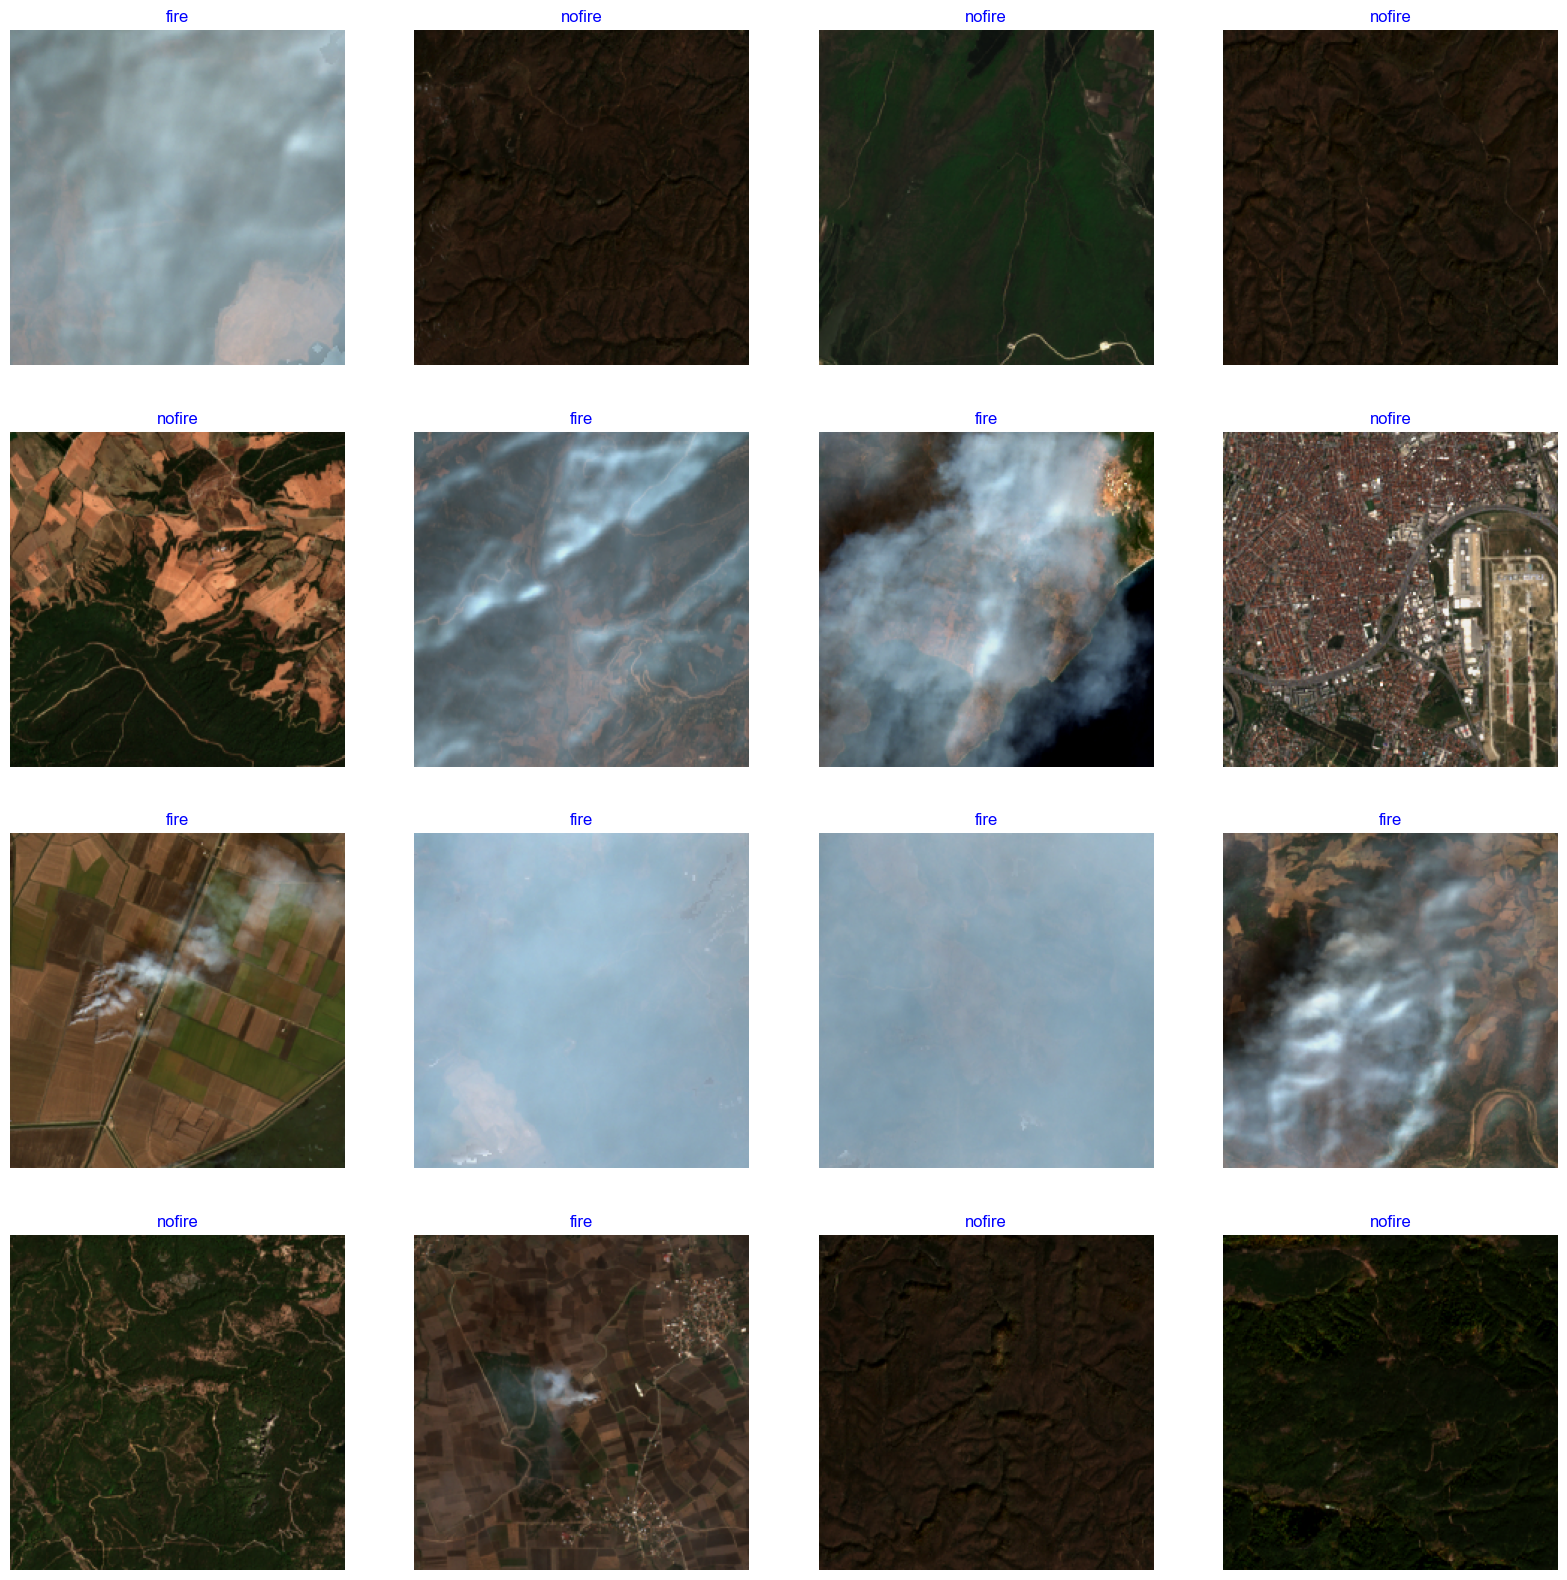

In [5]:
g_dict = train_gen.class_indices
classes = list(g_dict.keys())
images, labels = next(train_gen)
num_samples = len(images)

plt.figure(figsize=(20,20))

for i in range(min(16, num_samples)):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255
    plt.imshow(image)
    class_index = int(labels[i])
    class_name = classes[class_index]
    plt.title(class_name, color='blue', fontsize=12)
    plt.axis('off')
plt.show()

In [6]:
img_shape = (img_size[0], img_size[1], 3)  # Girdi boyutu
num_classes = 1  # Binary classification için

model3 = Sequential([
    Conv2D(16, 11, activation='leaky_relu', padding='same', input_shape=img_shape),
    BatchNormalization(),
    MaxPooling2D((3,3)),
    Dropout(0.25),
    
    Conv2D(32, 5, activation='leaky_relu', padding='same'),
    MaxPooling2D((3,3)),
    
    Conv2D(64, 3, activation='leaky_relu', padding='same'),
    Conv2D(64, 3, activation='leaky_relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    
    Conv2D(256, 3, activation='leaky_relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    
    Flatten(),
    
    Dense(32, activation='leaky_relu'),
    Dense(64, activation='leaky_relu'),
    Dropout(0.5),
    Dense(128, activation='leaky_relu'),
    Dropout(0.5),
    Dense(num_classes, activation='sigmoid')
    
])

model3.compile(AdamW(learning_rate=.0001), loss='binary_crossentropy', metrics=['accuracy'])

model3.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 16)   │         5,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 74, 74, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       294,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 528,641 (2.02 MB)

 Trainable params: 527,969 (2.01 MB)

 Non-trainable params: 672 (2.62 KB)

In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
early_stopping = EarlyStopping(
    patience=10,
    min_delta=0,
    mode=min,
    monitor='val_loss',
    verbose=0,
    restore_best_weights=True,
    baseline=None
)

plateau = ReduceLROnPlateau(
    patience=4,
    mode=min,
    monitor='val_loss',
    factor=.2,
    verbose=0
)

In [8]:
history3 = model3.fit(x= train_gen, verbose=1, validation_data=valid_gen,
                        epochs=10, callbacks=[early_stopping, plateau])

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 23s 643ms/step - accuracy: 0.6667 - loss: 0.6546 - val_accuracy: 0.8804 - val_loss: 0.5028 - learning_rate: 1.0000e-04
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 363ms/step - accuracy: 0.8853 - loss: 0.2701 - val_accuracy: 0.8261 - val_loss: 0.4744 - learning_rate: 1.0000e-04
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 364ms/step - accuracy: 0.9313 - loss: 0.2299 - val_accuracy: 0.8913 - val_loss: 0.3636 - learning_rate: 1.0000e-04
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 360ms/step - accuracy: 0.9284 - loss: 0.1723 - val_accuracy: 0.8913 - val_loss: 0.2744 - learning_rate: 1.0000e-04
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 362ms/step - accuracy: 0.9413 - loss: 0.1753 - val_accuracy: 0.7826 - val_loss: 0.3990 - learning_rate: 1.0000e-04
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 358ms/step - accuracy: 0.9421 - loss: 0.1547 - val_accuracy: 0.9239 - val_loss: 0.2144 - learning_rate: 1.0000e-04
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 360ms/step - acc

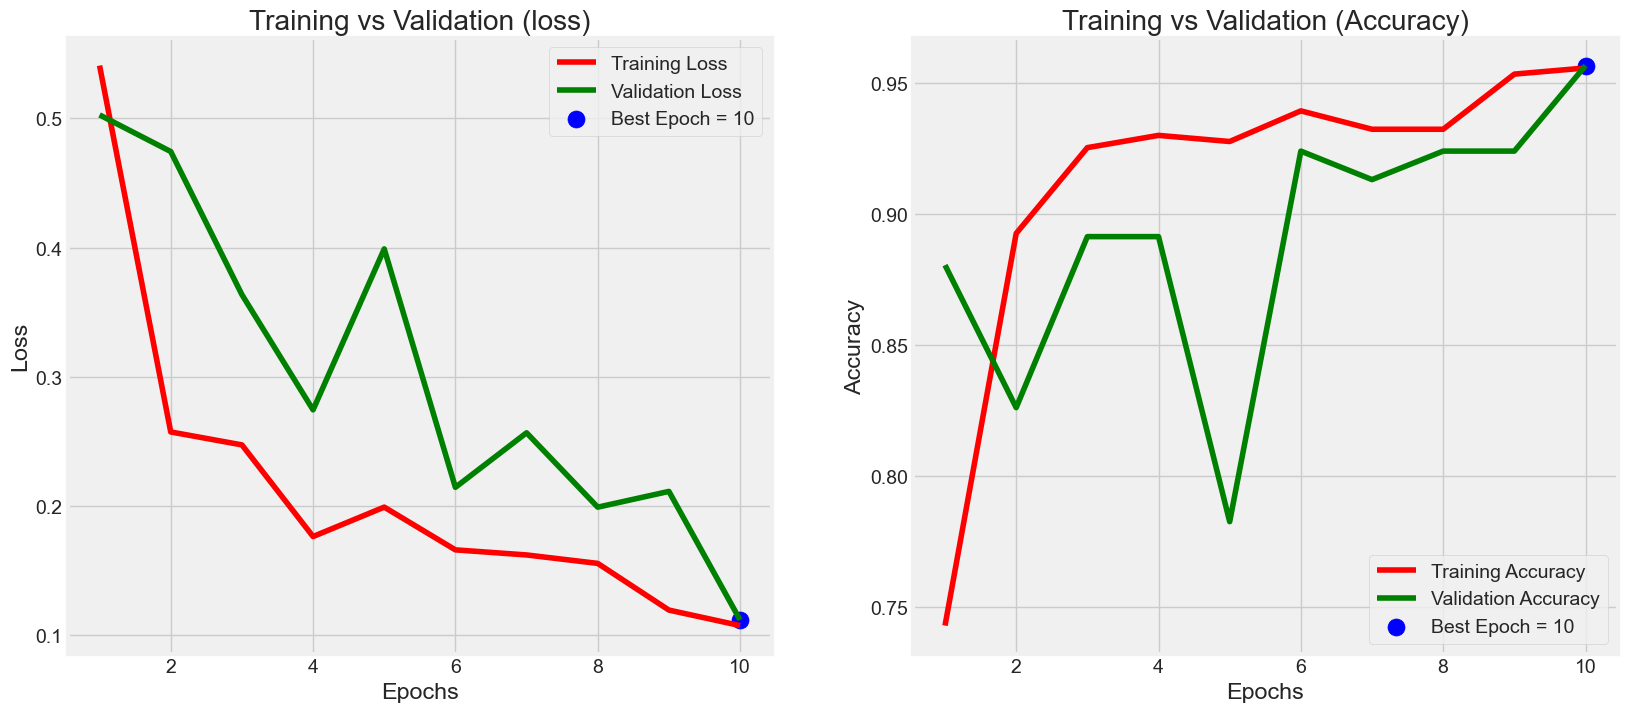

In [9]:
train_acc = history3.history['accuracy']
train_loss = history3.history['loss']

val_acc = history3.history['val_accuracy']
val_loss = history3.history['val_loss']

index_loss = np.argmin(val_loss)
index_acc = np.argmax(val_acc)

val_lowest = val_loss[index_loss]
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]

loss_label = f'Best Epoch = {str(index_loss + 1)}'
acc_label = f'Best Epoch = {str(index_acc + 1)}'

plt.figure(figsize= (20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs , train_loss , 'r', label = 'Training Loss')
plt.plot(Epochs , val_loss , 'g' , label = 'Validation Loss')
plt.scatter(index_loss +1 , val_lowest , s = 150 , c = 'blue' , label = loss_label)
plt.title('Training vs Validation (loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Epochs , train_acc , 'r', label= 'Training Accuracy')
plt.plot(Epochs , val_acc , 'g' , label = 'Validation Accuracy')
plt.scatter(index_acc + 1 , val_highest , s= 150 , c = 'blue' , label= acc_label)
plt.title('Training vs Validation (Accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show();

In [10]:
train_score = model3.evaluate(train_gen , steps= 32 , verbose = 1)
val_score = model3.evaluate(valid_gen , steps = 32 , verbose = 1)
test_score = model3.evaluate(test_gen , steps = 32 , verbose = 1)

print(f'Train loss = {train_score[0] }')
print(f'Train Accuracy = {train_score[1]}')
print(f'Validation loss = {val_score[0]}')
print(f'Validation Accuracy = {val_score[1]}')
print(f'Test loss = {test_score[0]}')
print(f'Test Accuracy = {test_score[1]}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 147ms/step - accuracy: 0.9789 - loss: 0.1113
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9563 - loss: 0.1077 
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9540 - loss: 0.1175 
Train loss = 0.11289012432098389
Train Accuracy = 0.9719626307487488
Validation loss = 0.11176462471485138
Validation Accuracy = 0.95652174949646
Test loss = 0.11708177626132965
Test Accuracy = 0.9560439586639404


In [11]:
# Make predictions on the test set
preds = model3.predict(test_gen)

# Convert the predictions to binary classes (0 or 1)
predicted_classes = (preds > 0.5).astype(int)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step


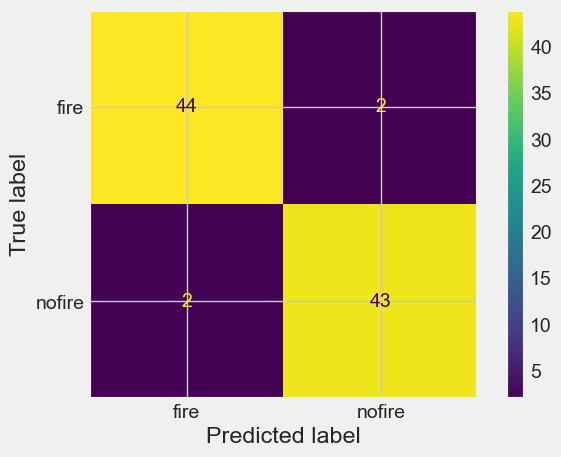

In [12]:
# Get the true labels from the generator
true_classes = test_gen.classes

# Calculate the confusion matrix
confusion = confusion_matrix(true_classes, predicted_classes)

# Display the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=test_gen.class_indices)
disp.plot(cmap='viridis', values_format='d')

In [13]:
# Generate and print the classification report
classification_rep = classification_report(true_classes, predicted_classes, target_names=test_gen.class_indices)
print("\nClassification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

        fire       0.96      0.96      0.96        46
      nofire       0.96      0.96      0.96        45

    accuracy                           0.96        91
   macro avg       0.96      0.96      0.96        91
weighted avg       0.96      0.96      0.96        91

